In [6]:
import numpy as np
from scipy import stats
import scipy
import pandas as pd
import statsmodels.api as sm # Ordinary Least Square(OLS)이 들어가있음.
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


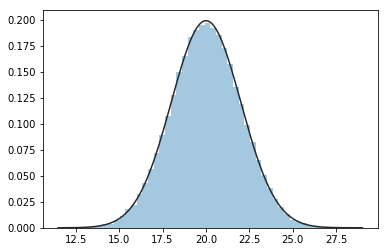

In [3]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정/random값이 계속 동일하게 나온다는 의미임.
np.random.seed(seed = 1234)
#평균:20, 표준편차: 2, 데이터 수: 100000의 정규분포를 따르는 데이터 생성
normal = np.random.normal(20, 2, 100000)
#histogram
sns.distplot(normal, fit = stats.norm, kde = False) #fit은 연속형graph를 fit하게 그리는 것/kernel density estimation(kde) True일 때 histogram graph그려줌.

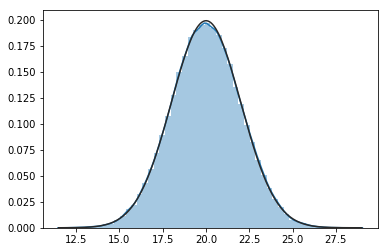

In [3]:
sns.distplot(normal, fit= stats.norm, kde = True)

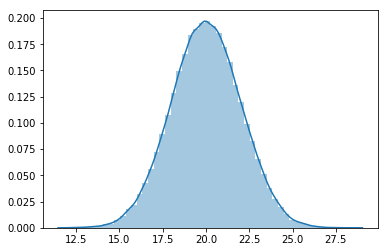

In [4]:
sns.distplot(normal, kde = True)

In [5]:
#데이터 확인, 소수점 3
normal.round(3)

array([20.943, 17.618, 22.865, ..., 20.059, 17.559, 20.768])

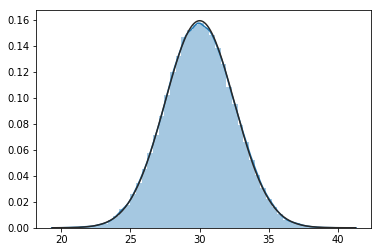

In [6]:
# 실습1 slide #12
np.random.seed(seed = 1234)
nnormal = np.random.normal(30,2.5,100000)
sns.distplot(nnormal, fit = stats.norm, kde = True)

In [7]:
# 연습1 slide #13
mu = 115
sigma = 20
x = 135
#누적확률값 계산
prop = stats.norm.cdf(x, mu, sigma)
print(prop)
print("{0}분 이상 걸리는 A/S 작업 비율: {1:.1f}%".format(x, (1-prop)*100)) # {1:이건 format뒤의 값이 튜플이라 2번째 parameter 따오려고 그런거임. {0: 이건 걍 하나만 넣을 때

0.8413447460685429
135분 이상 걸리는 A/S 작업 비율: 15.9%


In [8]:
# 실습2 slide #14
m = 175
sd = 5
h = 180
p = stats.norm.cdf(h, m, sd)
print(p)
print("나의 키는 백분율 {0:.1f}%".format(p*100))

0.8413447460685429
나의 키는 백분율 84.1%


In [10]:
#180 이상 190 이하
m = 175
sd = 5
h = 180
p = stats.norm.cdf(h, m, sd)
p1 = stats.norm.cdf(190, m, sd)#norm dist 일 때 누적확률계산 norm.cdf
btw = p1-p
print("180이상 190이하 {0:.1f}%".format(btw*100))

180이상 190이하 15.7%


## 어떤 자동차 1리터당 주행거리가 평균 12km, 표준편차 3km인 정규분포를 이룬다고 하자.

In [11]:
# 과제 1번 실습 slide #15
m_car = 12
sd_car = 3
p_car = stats.norm.cdf(9, m_car, sd_car) #9km 
p_car1 = stats.norm.cdf(12, m_car, sd_car) #12km
p_car2 = stats.norm.cdf(15, m_car, sd_car) #15km
print("1) 1리터를 가지고 12km 이상 15km 이하를 달릴 확률은 얼마인가?: {0:.3f}".format(p_car2-p_car1))
print("2) 1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 얼마인가?: {0:.3f}".format(p_car2-p_car))
print("3) 1리터를 가지고 15km 이상을 달릴 확률은 얼마인가?: {0:.3f}".format(1-p_car2))

1) 1리터를 가지고 12km 이상 15km 이하를 달릴 확률은 얼마인가?: 0.341
2) 1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 얼마인가?: 0.683
3) 1리터를 가지고 15km 이상을 달릴 확률은 얼마인가?: 0.159


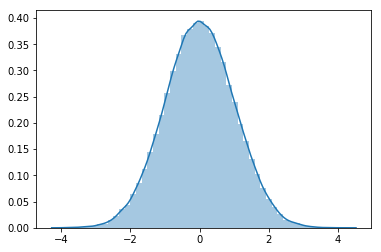

In [12]:
# 연습2 slide #16
np.random.seed(seed = 1234)
normal = np.random.normal(0, 1, 100000)
sns.distplot(normal)

In [13]:
normal.round(3)

array([ 0.471, -1.191,  1.433, ...,  0.029, -1.221,  0.384])

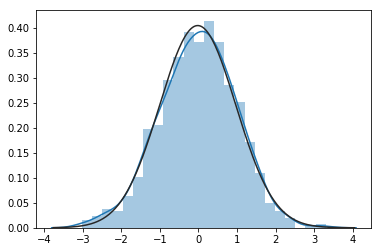

In [14]:
#실습4 slide #17
sns.distplot(np.random.normal(0, 1, 1000), fit = stats.norm, kde = True)

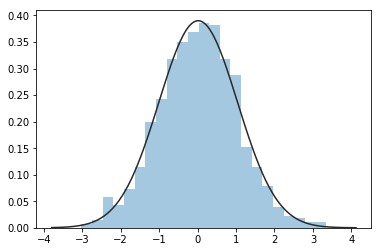

In [15]:
# 연습3 slide #18
np.random.seed(seed = 1234)
t_df29 = np.random.standard_t(df = 29, size = 1000)
sns.distplot(t_df29, fit = stats.norm, kde = False)
# n = 1000, Degree of Freedom = 29

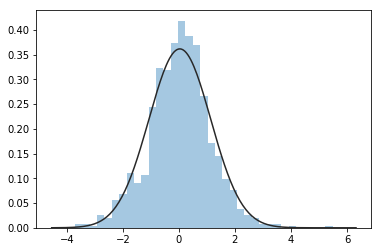

In [16]:
# 연습3 slide #18
np.random.seed(seed = 1234)
t_df10 = np.random.standard_t(df = 10, size = 1000)
sns.distplot(t_df10, fit = stats.norm, kde = False)
# n = 1000, Degree of Freedom = 10

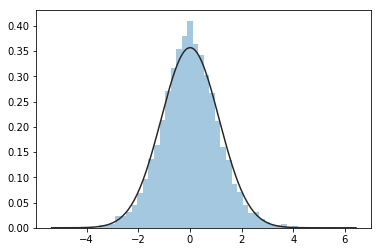

In [17]:
# 실습 slide #19
np.random.seed(seed = 1234)
t_df10 = np.random.standard_t(df = 10, size = 10000)
sns.distplot(t_df10, fit = stats.norm, kde = False)
# n = 10000, Degree of Freedom = 10

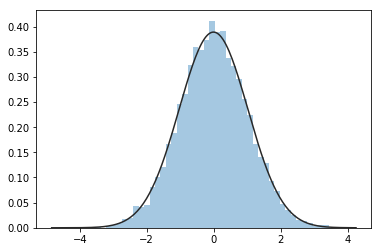

In [18]:
# 실습 slide #19
np.random.seed(seed = 1234)
t_df10 = np.random.standard_t(df = 50, size = 10000)
sns.distplot(t_df10, fit = stats.norm, kde = False)
# n = 10000, Degree of Freedom = 50

In [19]:
# 연습 slide #20
t = 1.53
df = 5
prop=stats.t.cdf(t, df)
print("P(T <= {0}) : {1:.3f}".format(t,prop))

P(T <= 1.53) : 0.907


In [20]:
# 연습 slide #20
t = 2.0
df = 10
prop=stats.t.cdf(t, df)
print("P(T <= {0}) : {1:.3f}".format(t,prop))

P(T <= 2.0) : 0.963


In [21]:
# 교수님께서 내주신 연습자료 1<=T<=2 slide #20
t = 1.0
t1 = 2.0
df = 10
prop=stats.t.cdf(t, df)
prop1=stats.t.cdf(t1, df)
print("P({0} <= T <= {1}) : {2:.3f}".format(t,t1,prop1-prop))

P(1.0 <= T <= 2.0) : 0.134


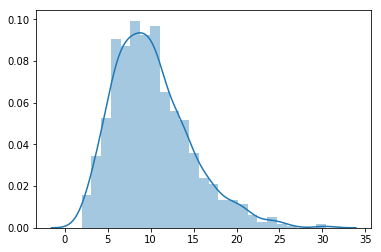

In [22]:
# 연습 slide #22
np.random.seed(seed=1234)
chisq_df10 = np.random.chisquare(df = 10, size = 1000)
sns.distplot(chisq_df10, kde = True)

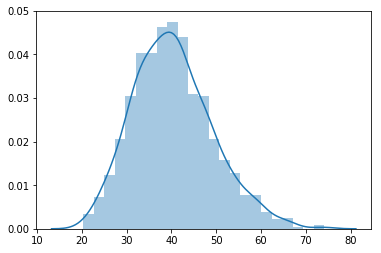

In [23]:
# 연습 slide #22
np.random.seed(seed=1234)
chisq_df40 = np.random.chisquare(df = 40, size = 1000)
sns.distplot(chisq_df40, kde = True)

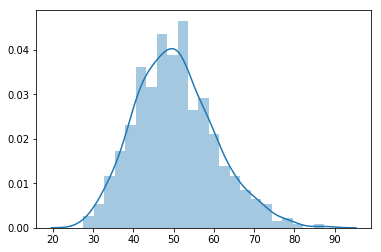

In [24]:
np.random.seed(seed=1234)
chisq_df50 = np.random.chisquare(df = 50, size = 1000)
sns.distplot(chisq_df50, kde = True)

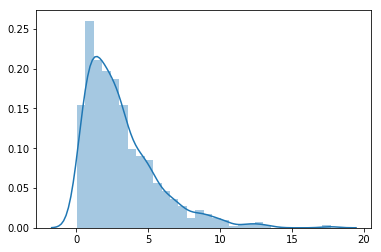

In [25]:
#실습 df = 3, df = 50 slide #23
np.random.seed(seed=1234)
chisq_df3 = np.random.chisquare(df = 3, size = 1000)
sns.distplot(chisq_df3, kde = True)

In [26]:
# slide #24
chisq = 10
df = 30
# 누적확률 값 계산
prop = stats.chi2.cdf(chisq, df)
print("P(X<={0}): {1:.4f}".format(chisq,prop))

P(X<=10): 0.0002


In [27]:
#실습 slide #25
chisq = 3.0
df = 8
# 누적확률 값 계산
prop = stats.chi2.cdf(chisq, df)
print("P(X<={0}): {1:.4f}".format(chisq,prop))

P(X<=3.0): 0.0656


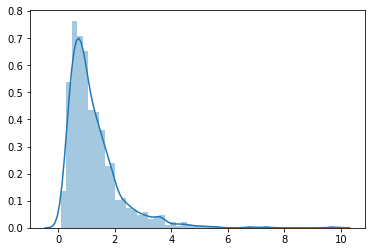

In [28]:
#연습 slide #26
np.random.seed(seed = 1234)
F_df10_10=np.random.f(dfnum=10,dfden=10,size=1000) #dfnum은 분자의 자유도 dfden은 분모의 자유도
sns.distplot(F_df10_10,kde=True)

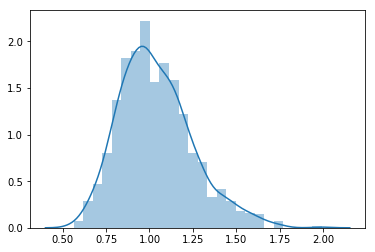

In [29]:
#slide #26
np.random.seed(seed = 1234)
F_df100_100=np.random.f(dfnum=100,dfden=100,size=1000) #dfnum은 분자의 자유도 dfden은 분모의 자유도
sns.distplot(F_df100_100,kde=True)

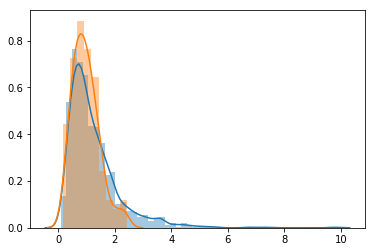

In [30]:
# 실습 slide #27
np.random.seed(seed = 1234)
F_df10_10=np.random.f(dfnum=10,dfden=10,size=1000)
sns.distplot(F_df10_10,kde=True)
F_df10_50=np.random.f(dfnum=10,dfden=50,size=100)
sns.distplot(F_df10_50,kde=True)

In [31]:
# slide #28
f = 2
dfnum = 15
dfden = 15
# 누적확률 값 계산
prop = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<={0}):{1:.3f}".format(f,prop))

P(X<=2):0.904


In [32]:
# slide #29
x = 1500
alpha = 2.2 #형상모수
beta = 1200 #척도모수
#누적확률 값 계산
prop = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>={0}):{1:.5f}".format(x,(1-prop)))

P(X>=1500):0.19518


In [33]:
# slide #30
x = 2500
alpha = 5.2 #형상모수
beta = 2200 #척도모수
#누적확률 값 계산
prop = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>={0}):{1:.5f}".format(x,(1-prop)))

P(X>=2500):0.14313


In [34]:
# slide #30
x = 1200
alpha = 2.5 #형상모수
beta = 1500 #척도모수
#누적확률 값 계산
prop = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>={0}):{1:.5f}".format(x,(1-prop)))

P(X>=1200):0.56415


In [35]:
# slide #34
n = 3
for i in range(n+1):
    prop = stats.binom.pmf(k=i,n=n,p=0.4)
    print("P(X={0})={1:.3f}".format(i,prop))

P(X=0)=0.216
P(X=1)=0.432
P(X=2)=0.288
P(X=3)=0.064


In [36]:
n = 3
for i in range(n+1):
    prop = stats.binom.pmf(k=i,n=n,p=0.6)
    print("P(X={0})={1:.3f}".format(i,prop))

P(X=0)=0.064
P(X=1)=0.288
P(X=2)=0.432
P(X=3)=0.216


In [37]:
n = 5
total = 0
for i in range(n+1):
    prop = stats.binom.pmf(k=i,n=n,p=0.3)
    total += prop
    print(i,prop)
print(total)

0 0.16807000000000002
1 0.3601499999999999
2 0.3086999999999999
3 0.13229999999999992
4 0.028349999999999976
5 0.002429999999999999
0.9999999999999998


In [38]:
mu = 2
prop = stats.poisson.pmf(3, mu)
cdf_prop = stats.poisson.cdf(2, mu)
print("1분당 {0}번의 전화가 걸려올 확률: {1:.4f}".format(3,prop))
print("1분당 최대 {0}회 이하의 전화가 걸려올 확률: {1:.4f}".format(2,cdf_prop))

1분당 3번의 전화가 걸려올 확률: 0.1804
1분당 최대 2회 이하의 전화가 걸려올 확률: 0.6767


In [46]:
# 실습 slide #37
mu = 2
prop = stats.poisson.pmf(2, mu)
cdf_prop = stats.poisson.cdf(1, mu)
cdf_prop1 = 1-stats.poisson.cdf(2, mu)
print("1) 2명의 손님이 도착 %.4f" %prop) #사이에 , 붙이면 syntax 오류 나온다.
print("2) 1명 이하의 손님이 도착 %.4f" %cdf_prop)
print("3) 3명 이상의 손님이 도착 %.4f" %cdf_prop1)

1) 2명의 손님이 도착 0.2707
2) 1명 이하의 손님이 도착 0.4060
3) 3명 이상의 손님이 도착 0.3233


In [7]:
# pandas 시작
# 기술통계 연습
ds_mycars = pd.read_csv("./실습파일/mycars.csv",engine="python")
ds_mycars

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual,f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto,f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual,4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto,4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual,4,20,28,p,compact


In [8]:
df = ds_mycars[['model','mpg']]
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

In [9]:
# 실습 
df = ds_mycars[['manufacturer','mpg']]
df.groupby('manufacturer').describe()

mpg                                                    
             count       mean       std   min   25%   50%    75%   max
manufacturer                                                          
audi          18.0  17.611111  1.974511  15.0  16.0  17.5  18.75  21.0
chevrolet     19.0  15.000000  2.924988  11.0  13.5  15.0  16.50  22.0
dodge         37.0  13.135135  2.485091   9.0  11.0  13.0  15.00  18.0
ford          25.0  14.000000  1.914854  11.0  13.0  14.0  15.00  18.0
honda          9.0  24.444444  1.943651  21.0  24.0  24.0  25.00  28.0
hyundai       14.0  18.642857  1.499084  16.0  18.0  18.5  19.75  21.0
jeep           8.0  13.500000  2.507133   9.0  12.5  14.0  15.00  17.0
land rover     4.0  11.500000  0.577350  11.0  11.0  11.5  12.00  12.0
lincoln        3.0  11.333333  0.577350  11.0  11.0  11.0  11.50  12.0
mercury        4.0  13.250000  0.500000  13.0  13.0  13.0  13.25  14.0
nissan        13.0  18.076923  3.426892  12.0  15.0  19.0  19.00  23.0
pontiac        5.0  17.000000  1.000000  16.0  16.0  17.0  18.00  18.0
subaru        14.0  19.285714  0.913874  18.0  19.0  19.0  20.00  21.0
toyota        34.0  18.529412  4.046961  11.0  15.0  18.0  21.00  28.0
volkswagen    27.0  20.925926  4.556702  16.0  18.5  21.0  21.00  35.0

In [10]:
df = ds_mycars[['driving','mpg']]
df
# df.groupby('driving').describe()

,driving,mpg
0,f,18
1,f,21
2,f,20
3,f,21
4,f,16
5,f,18
6,f,18
7,4,18
8,4,16
9,4,20


In [44]:
ds_Exh_QC1 = pd.read_csv("./실습파일/EXH_QC1.csv", engine = "python")
df = ds_Exh_QC1[['Flaws','Period']]
count = df['Flaws'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count / sum(count)*100
cumpct = np.cumsum(percent)
count_data = pd.DataFrame({'Count': count, 'CumCnt': cumcnt, 'Percent': percent, 'CumPct': cumpct })
count_data.columns.name='Flaws'
count_data

Flaws,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [45]:
# 실습 slide #45
ds_mycars = pd.read_csv("./실습파일/mycars.csv",engine="python")
df = ds_mycars[['model','mpg']]
count = df['model'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count / sum(count)*100
cumpct = np.cumsum(percent)
count_data = pd.DataFrame({'Count': count, 'CumCnt': cumcnt, 'Percent': percent, 'CumPct': cumpct })
count_data.columns.name='model'
count_data

model,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


In [48]:
ds_example = pd.read_csv("./실습파일/EXH_QC.csv",engine="python")
df = ds_example[['Cabbage weight']].copy()
lower,upper=scipy.stats.norm.interval(0.95,loc = 2.7, scale = 0.397/np.sqrt(40))
lower,upper=scipy.stats.norm.interval(0.95,loc = df.mean(), scale = stats.sem(df))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간: ([2.57],[2.82])


## 새로운 품종의 감자 20 BOX를 랜덤추출하여 무게를 측정한 결과가 다음과 같음. 
## (단, 모표준편차는 3.8로 알려져 있음)
## 이 자료로 부터 신품종 배추의 평균 무게에 대한 95% 신뢰구간을 구하시오.

In [49]:
potatoes = [18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]
total = 0
for i in potatoes:
    total += i
m = total/len(potatoes)    
df = potatoes.copy()
lower,upper = scipy.stats.norm.interval(0.95, loc = m, scale = 3.8/np.sqrt(20))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간: (17.83,21.17)


In [50]:
ds_strength = pd.read_csv("./실습파일/ds.csv",engine="python")
df = ds_strength[['strength']].copy()
print(df)
lower,upper = scipy.stats.norm.interval(0.95, loc = df.mean(), scale = stats.sem(df))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

    strength
0       54.1
1       53.3
2       56.1
3       55.7
4       54.0
5       54.1
6       54.5
7       57.1
8       55.2
9       53.8
10      54.1
11      54.1
12      56.1
13      55.0
14      55.9
15      56.0
16      54.9
17      54.3
18      53.9
19      55.0
신뢰구간: ([54.42],[55.3])


In [51]:
df = pd.DataFrame({'sample':[54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,53.8,54.1,54.1,56.1,55.0,55.9,56.0,54.9,54.3,53.9,55.0]})
print(df)
lower,upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

    sample
0     54.1
1     53.3
2     56.1
3     55.7
4     54.0
5     54.1
6     54.5
7     57.1
8     55.2
9     53.8
10    54.1
11    54.1
12    56.1
13    55.0
14    55.9
15    56.0
16    54.9
17    54.3
18    53.9
19    55.0
신뢰구간: ([54.39],[55.33])


In [52]:
df = pd.DataFrame({'sample':[73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})
lower,upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간: (%.2f,%.2f)" %(lower.round(2),upper.round(2)))

신뢰구간: (70.60,72.40)


In [53]:
df1 = pd.DataFrame({'sample':[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]})
df2 = pd.DataFrame({'sample':[7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})
t_result = stats.ttest_ind(df1,df2)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)
print("2-sample t-test")
print("t검정통계량:{}".format(t))
print("p-value:{}".format(p))

2-sample t-test
t검정통계량:[-3.122]
p-value:[0.003]


In [54]:
df = pd.DataFrame({'sample':[74.5,81.2,73.8,82.0,76.3,75.7,80.2,72.6,77.9,82.8]})
t_result = stats.ttest_1samp(df, 76.7)
t, p = t_result.statistic.round(3),t_result.pvalue.round(4)
print("1-Sample t-test")
print("t검정통계량:{}".format(t))
print("p-value:{}".format(p))

1-Sample t-test
t검정통계량:[0.864]
p-value:[0.4098]


## 고객서비스센터의 고객만족도 평균은 76.7이다.
## 개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다.
## 개선활동이 만족도를 변화시켰는가? (α = 0.05)

In [55]:
df = pd.DataFrame({'sample':[85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})
t_result = stats.ttest_1samp(df, 76.7)
t, p = t_result.statistic.round(3),t_result.pvalue.round(4)
print("1-Sample t-test")
print("t검정통계량:{}".format(t))
print("p-value:{}".format(p))

1-Sample t-test
t검정통계량:[4.879]
p-value:[0.0009]
